In [1]:
import numpy as np
import matplotlib
matplotlib.use('nbAgg')
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

## Problem 1

Use the FuncAnimation class to animate the function $y = sin(x + \frac{t}{10})$ where $x \in [0, 2\pi]$, and t ranges from 0 to 100 seconds.
Save your animation to a file and embed the created file.

<IPython.core.display.Javascript object>


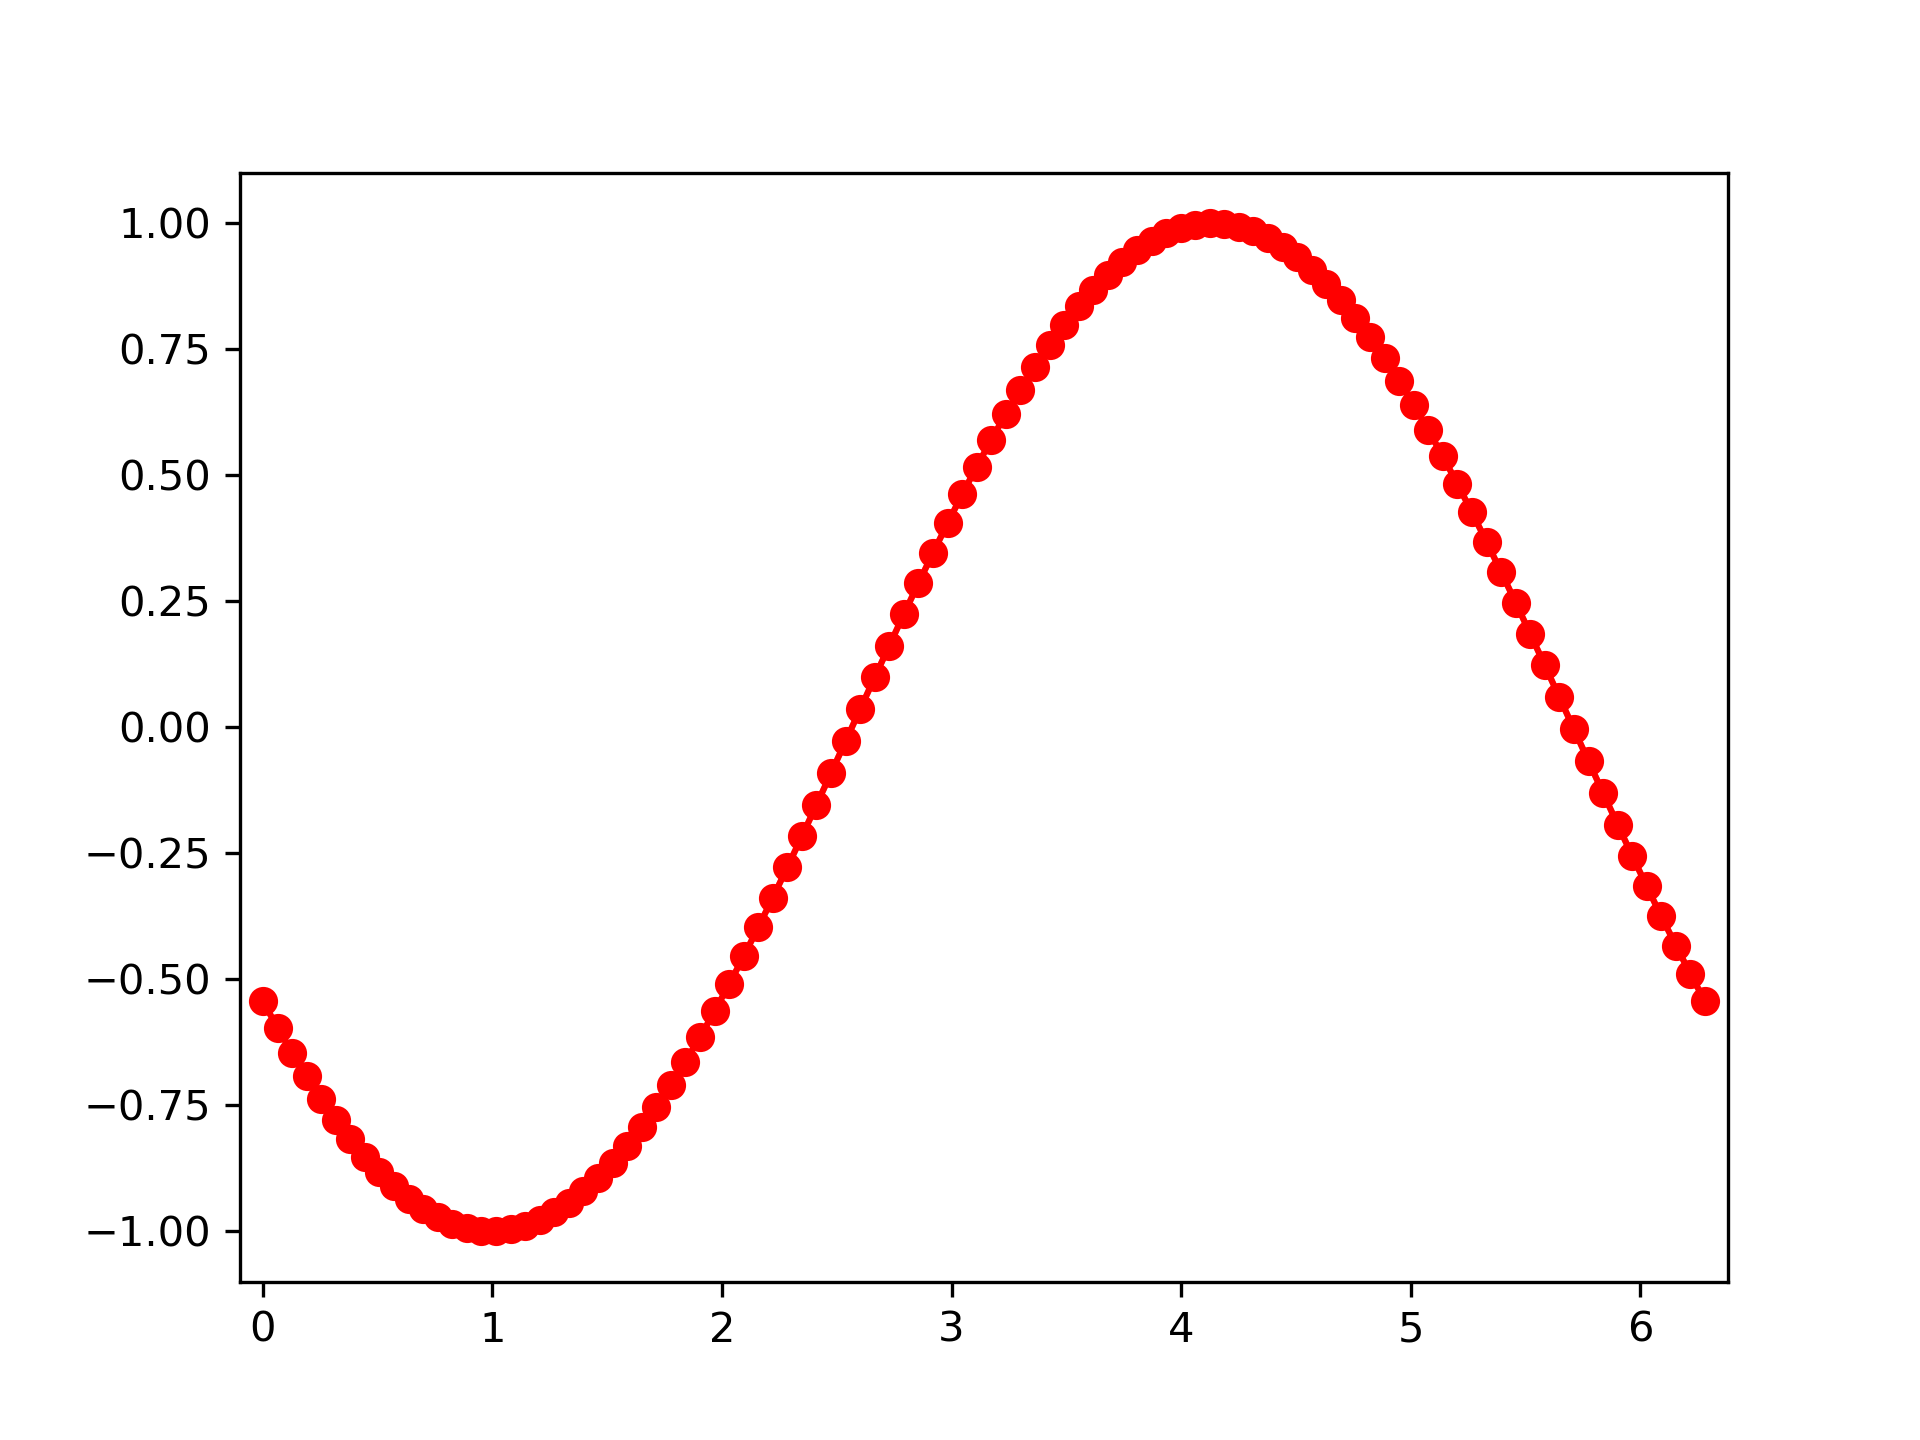

In [2]:
x = np.linspace(0,2*np.pi,100)
t = np.linspace(0,100,100) #time ranges from 0 to 99, 100 values
y = lambda x,t: np.sin(x+t/10) #lambdify a function 
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim((-0.1,2*np.pi+0.1))
ax.set_ylim((-1.1,1.1)) #set limits for viewing the graph
particle, = plt.plot([],[], marker='o', color='r') #particle object
traj, = plt.plot([],[], color='r', alpha=0.5) #trajectory object

def update(i): #takes an integer an updates the particle and trajectory
    traj.set_data(x,y(x,t[i]))
    particle.set_data(x,y(x,t[i]))
    return traj,particle
plt.show()
plt.ioff()
ani = animation.FuncAnimation(fig, update, frames=range(100), interval=25) #animates the changes in particle/trajectory
ani.save("bryce1.mp4")

<video src="bryce1.mp4" controls>

## Problem 2

The orbits for Mercury, Venus, Earth, and Mars are stored in the file `orbits.npz`. The file contains four NumPy arrays: `mercury`, `venus`, `earth`, and `mars`. The first column of each array contains the x-coordinates, the second column contains the y-coordinates, and the third column contians the z-coordinates, all relative to the Sun, and expressed in AU (astronomical units, the average distance between Earth and the Sun, approximately 150 million
kilometers).

Use `np.load('orbits.npz')` to load the data for the four planets' orbits. Create a 3D plot of the orbits, and compare your results with Figure 1.1.

<IPython.core.display.Javascript object>


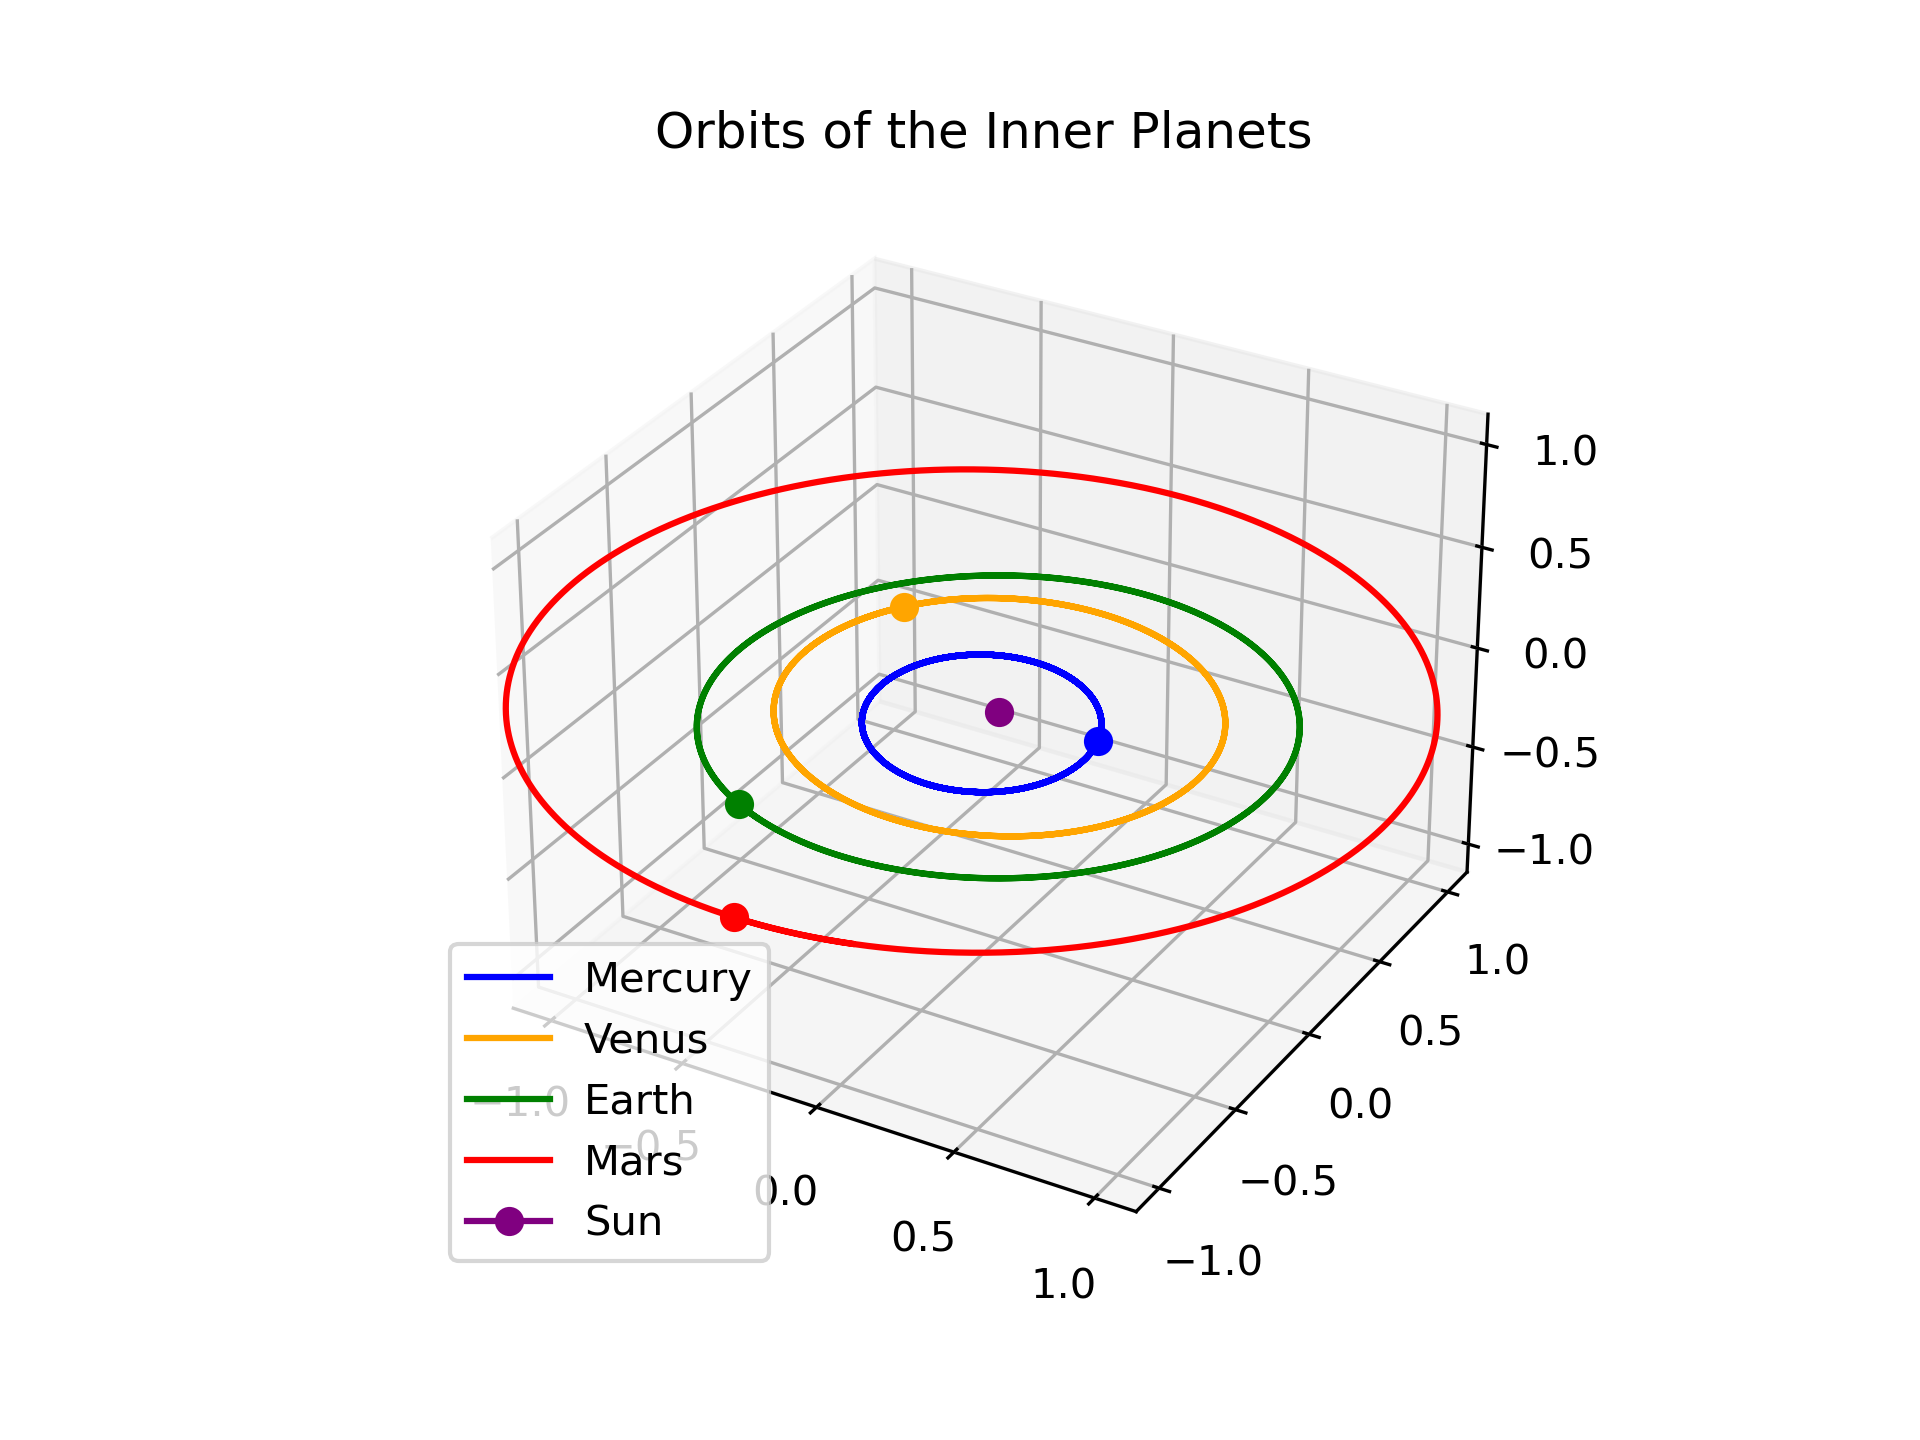

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
orbits = np.load('orbits.npz')
ax.set_xlim(-1.1,1.1) #set viewing limits in 3d
ax.set_ylim(-1.1,1.1)
ax.set_zlim(-1.1,1.1)

merc_x,merc_y,merc_z = orbits['mercury'][:,0],orbits['mercury'][:,1],orbits['mercury'][:,2] #get x,y,z data for all 4 planets
ven_x,ven_y,ven_z = orbits['venus'][:,0],orbits['venus'][:,1],orbits['venus'][:,2],
earth_x,earth_y,earth_z = orbits['earth'][:,0],orbits['earth'][:,1],orbits['earth'][:,2]
mars_x,mars_y,mars_z = orbits['mars'][:,0],orbits['mars'][:,1],orbits['mars'][:,2]

plt.plot(merc_x,merc_y,merc_z,color="blue",label="Mercury") #trajectory
plt.plot(merc_x[0],merc_y[0],merc_z[0],color="blue",marker="o") #first point in dataset
plt.plot(ven_x,ven_y,ven_z,color="orange",label="Venus")
plt.plot(ven_x[0],ven_y[0],ven_z[0],color="orange",marker="o")
plt.plot(earth_x,earth_y,earth_z,color="green",label="Earth")
plt.plot(earth_x[0],earth_y[0],earth_z[0],color="green",marker="o")
plt.plot(mars_x,mars_y,mars_z,color="red",label="Mars")
plt.plot(mars_x[0],mars_y[0],mars_z[0],color="red",marker="o")

plt.plot(0.0,0.0,0.0,c="purple",marker="o",label="Sun") #sun is at center (data is relative to sun)

plt.title("Orbits of the Inner Planets")

plt.legend()
plt.show()

## Problem 3

Each row of the arrays in `orbits.npz` gives the position of the planets at a
particular time. The arrays have 1400 points in time over a 700 day period (beginning on 2018-5-30). Create a 3D animation of the planet orbits. Display lines for the trajectories of the orbits and points for the current positions of the planets at each point in time. Your update() function will need to return a list of `Line3D` objects, one for each orbit trajectory and one for each planet position marker. Using `animation.save()`, save your animated plot, and embed you animated plot.

<IPython.core.display.Javascript object>


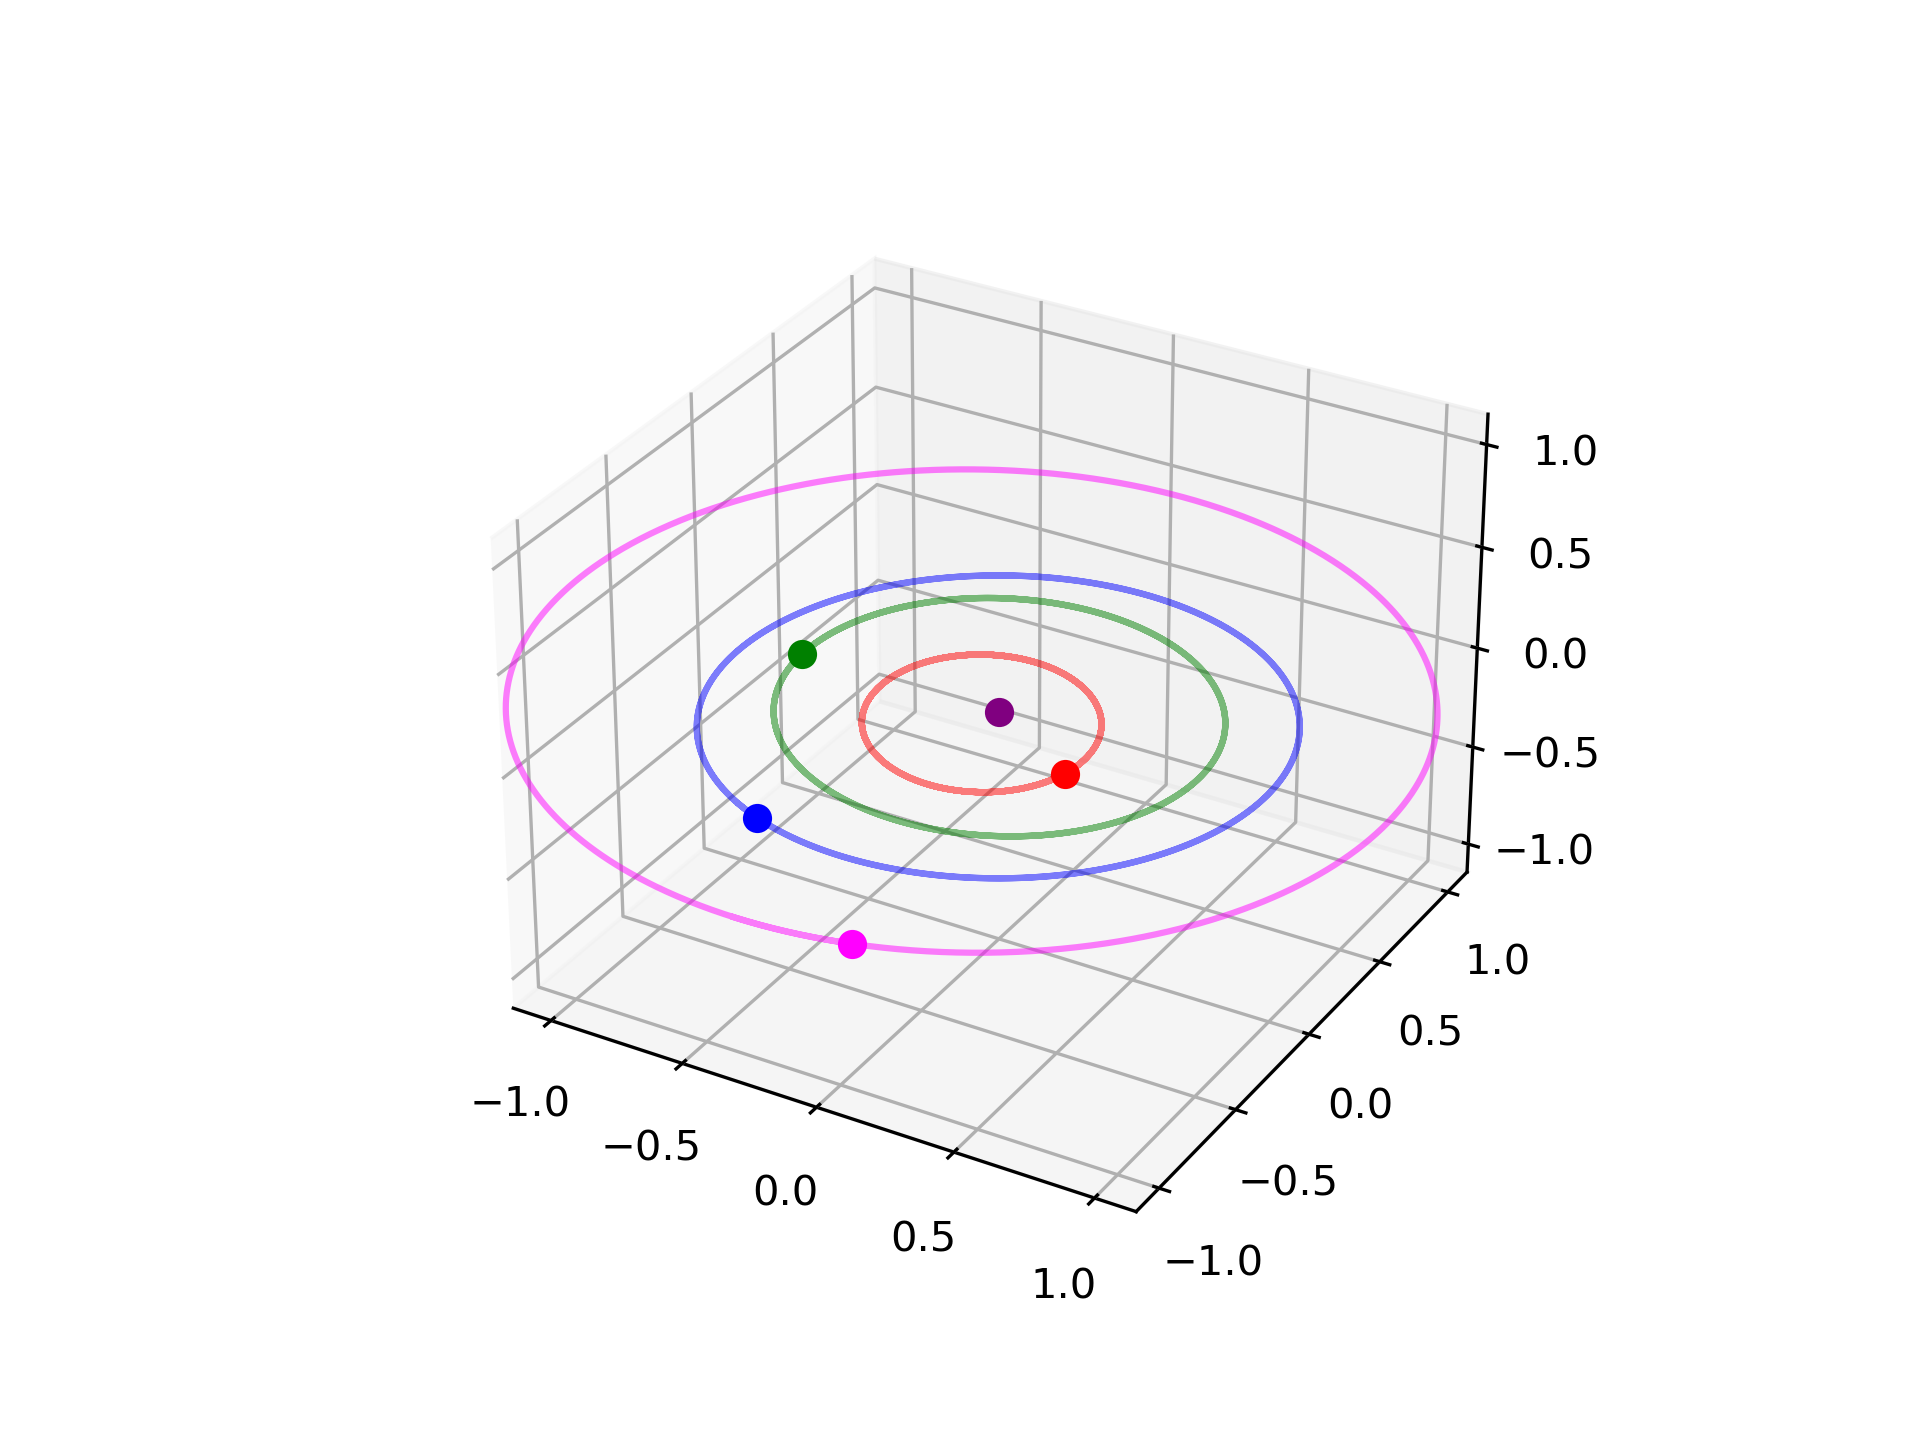

In [4]:
merc_x,merc_y,merc_z = orbits['mercury'][:,0],orbits['mercury'][:,1],orbits['mercury'][:,2] #get x,y,z data for all 4 planets
ven_x,ven_y,ven_z = orbits['venus'][:,0],orbits['venus'][:,1],orbits['venus'][:,2],
earth_x,earth_y,earth_z = orbits['earth'][:,0],orbits['earth'][:,1],orbits['earth'][:,2]
mars_x,mars_y,mars_z = orbits['mars'][:,0],orbits['mars'][:,1],orbits['mars'][:,2]

fig = plt.figure() #initalize figure object
ax = fig.add_subplot(111,projection='3d')
ax.set_xlim(-1.1,1.1) #set 3d viewing limits
ax.set_ylim(-1.1,1.1)
ax.set_zlim(-1.1,1.1)
    
particle1, = plt.plot([],[],[], marker='o', color='r') #intialize particle and traj objects for each planet
traj1, = plt.plot([],[],[], color='r', alpha=0.5)

particle2, = plt.plot([],[],[], marker='o', color='g')
traj2, = plt.plot([],[],[], color='g', alpha=0.5)

particle3, = plt.plot([],[],[], marker='o', color='b')
traj3, = plt.plot([],[],[], color='b', alpha=0.5)

particle4, = plt.plot([],[],[], marker='o', color='magenta')
traj4, = plt.plot([],[],[], color='magenta', alpha=0.5)
    
def update(i): #function updates them all at each iteration
    particle1.set_data([merc_x[i]],[merc_y[i]])
    traj1.set_data(merc_x[:i+1],merc_y[:i+1])
    particle1.set_3d_properties([merc_z[i]])
    traj1.set_3d_properties(merc_z[:i+1])
    
    particle2.set_data([ven_x[i]],[ven_y[i]])
    traj2.set_data(ven_x[:i+1],ven_y[:i+1])
    particle2.set_3d_properties([ven_z[i]])
    traj2.set_3d_properties(ven_z[:i+1])
    
    particle3.set_data([earth_x[i]],[earth_y[i]])
    traj3.set_data(earth_x[:i+1],earth_y[:i+1])
    particle3.set_3d_properties([earth_z[i]])
    traj3.set_3d_properties(earth_z[:i+1])
    
    particle4.set_data([mars_x[i]],[mars_y[i]])
    traj4.set_data(mars_x[:i+1],mars_y[:i+1])
    particle4.set_3d_properties([mars_z[i]])
    traj4.set_3d_properties(mars_z[:i+1])
    
    return particle1,traj1,particle2,traj2,particle3,traj3,particle4,traj4


plt.ioff()

plt.plot(0.0,0.0,0.0,color='purple',marker="o")
plt.show()

ani = animation.FuncAnimation(fig, update, frames=range(1400), interval=1) #animation object
ani.save('bryce3.mp4')

<video src="bryce3.mp4" controls>

## Problem 4

Make a surface plot of the bivariate normal density function given by:

$$f(\mathbf{x}) = \frac{1}{\sqrt{det(2\pi\Sigma)}}exp[-\frac{1}{2}(\mathbf{x}-\mathbf{\mu})^{T}\Sigma^{-1}(\mathbf{x}-\mathbf{\mu})]$$

Where $\mathbf{x} = [x,y]^T \in \mathbb{R}^2$, $\mathbf{\mu} = [0,0]^T$ is the mean vector, and: $$\Sigma = \begin{bmatrix} 1 & 3/5 \\ 3/5 & 2 \end{bmatrix}$$ is the covariance matrix.

<IPython.core.display.Javascript object>


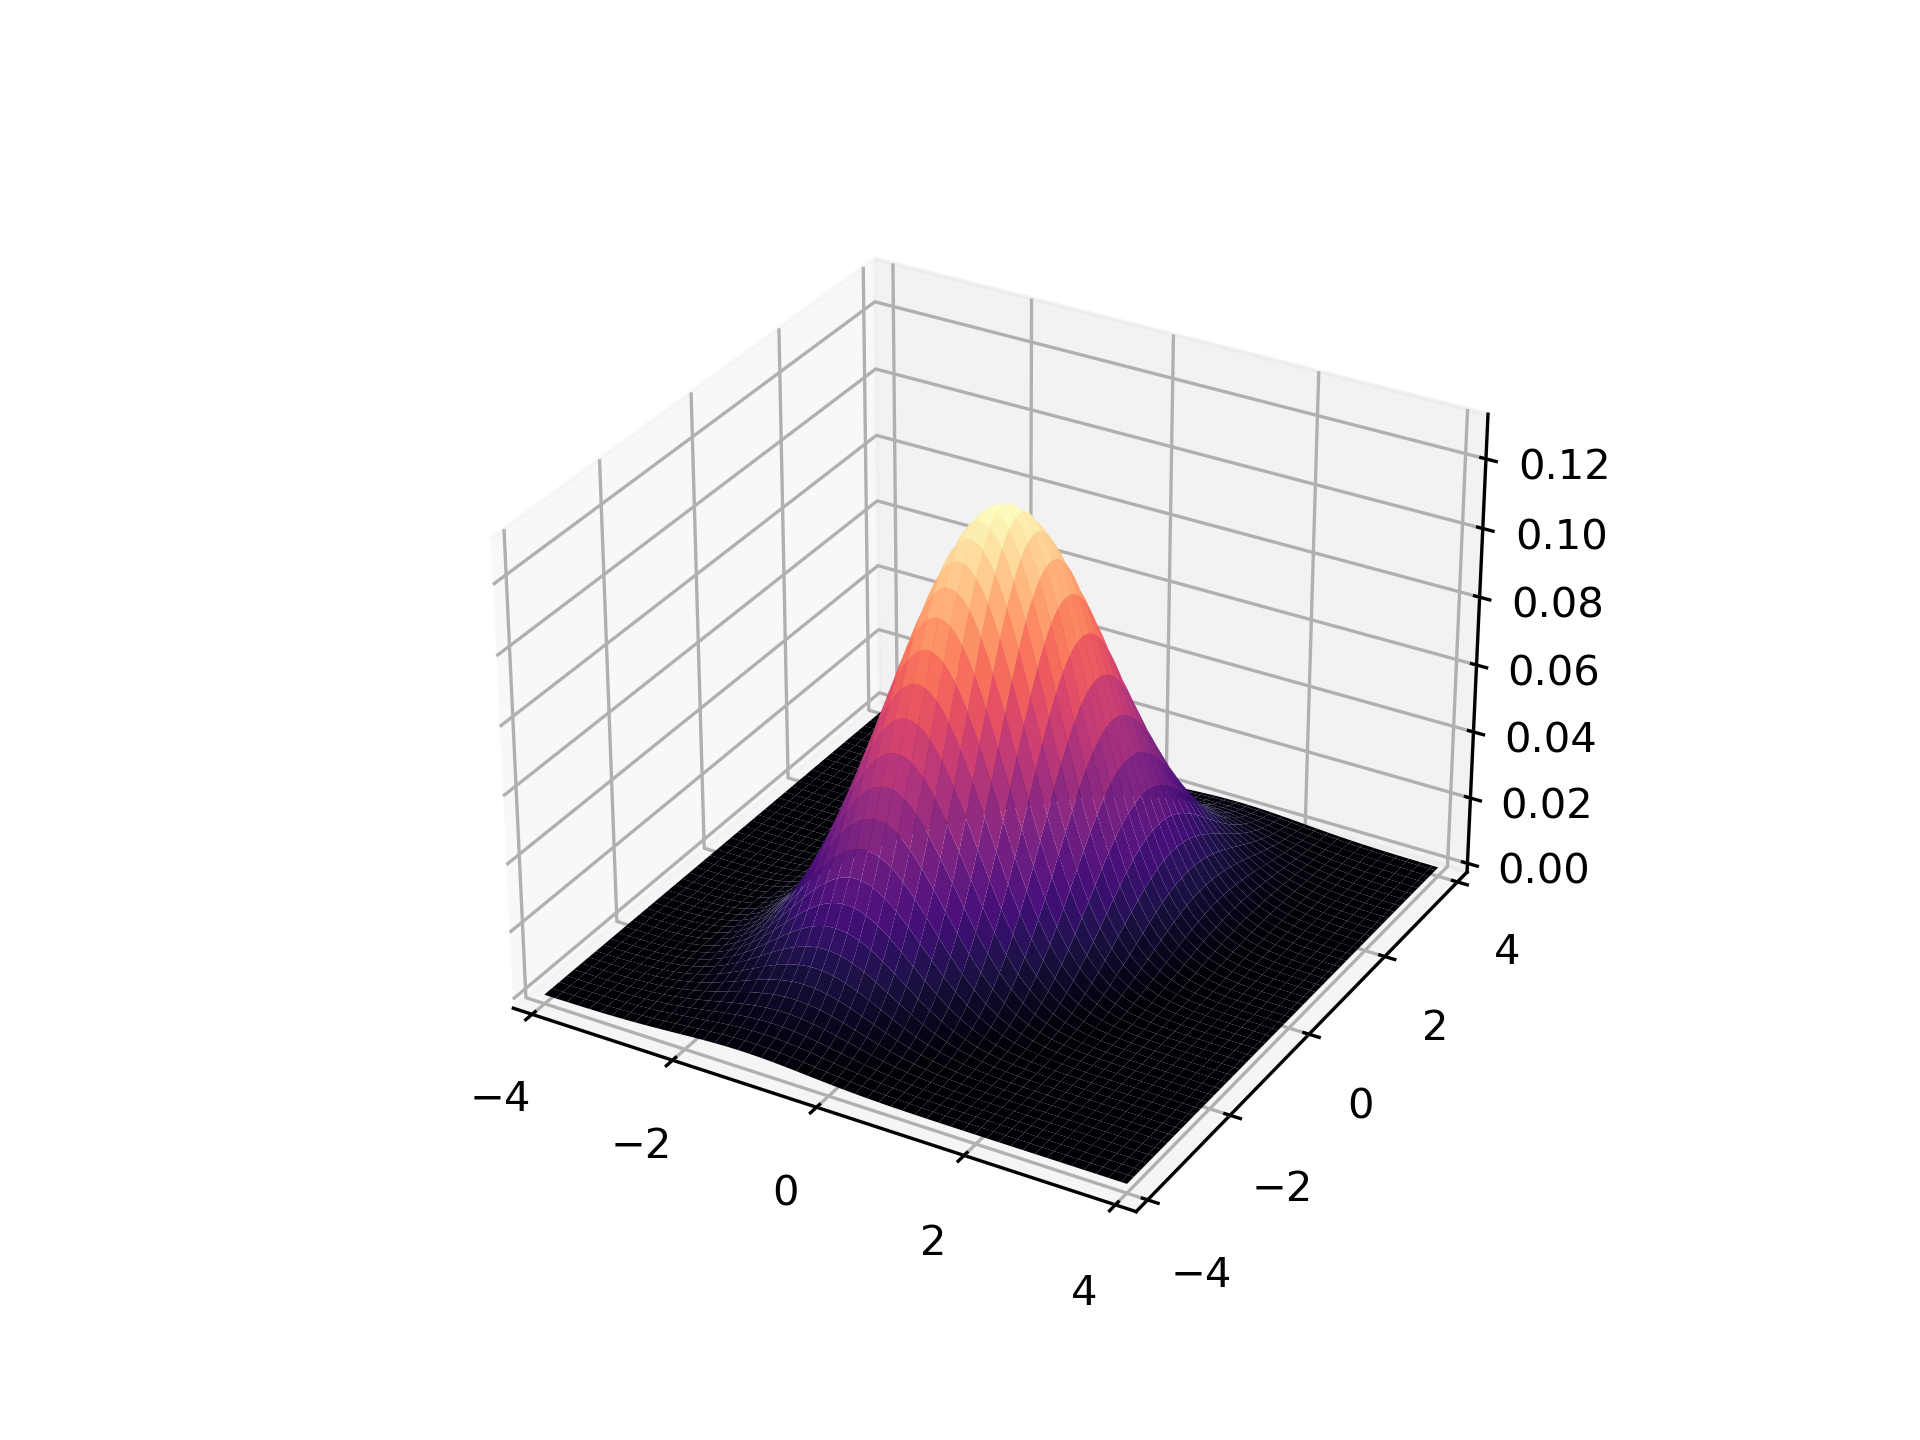

In [5]:
x = np.linspace(-4,4,100) #the subset of R^2 that we will map from
y = np.linspace(-4,4,100)
X,Y = np.meshgrid(x,y)
sigma = np.array([[1,3/5],[3/5,2]]) #the covariance matrix
denom = np.sqrt(np.linalg.det(2*np.pi*sigma)) #the denominator in the pdf expression
mean = np.array([0,0]) #center of the distribution

f = lambda x: ((1/denom)*np.exp((-1/2)*(x-mean)@np.linalg.inv(sigma)@(x-mean))) #pdf

Z = np.zeros(X.shape)

for i in range(len(Z)): #populate the output grid with evaluation of pdf
    for j in range(len(Z[0])):
        vec = np.array([X[i,j],Y[i,j]]) #input vector
        Z[i,j] = f(vec)

fig = plt.figure() #initialize figure object
ax = fig.add_subplot(111, projection='3d') #set to 3d type
ax.set_xlim(-4.1,4.1)
ax.set_ylim(-4.1,4.1)
ax.set_zlim(0,0.13)
ax.plot_surface(X,Y,Z,cmap="magma")
plt.show()

## Problem 5

Use the data in vibration.npz to produce a surface animation of the solution
to the wave equation for an elastic rectangular membrane. The file contains three NumPy arrays: `X`, `Y`, `Z`. `X` and `Y` are meshgrids of shape `(300,200)` corresponding to 300 points in
the y-direction and 200 points in the x-direction, all corresponding to a 2x3 rectangle with one corner at the origin. `Z` is of shape `(150,300,200)`, giving the height of the vibrating membrane at each (x,y) point for 150 values of time. In the language of partial differential equations, this is the solution to the following intital/boundary value problem for the wave equation:

$$u_{tt} = 6^2(u_{xx}+u_{yy})$$
$$(x,y) \in [0,2]\times[0,3],t \in [0,5]$$
$$u(t,0,y)=u(t,2,y)=u(t,x,0)=u(t,x,3) = 0$$
$$u(0,x,y) = xy(2-x)(3-y)$$

Load the data with `np.load('vibration.npz')`. Create a 3D surface animation of the vibrating membrane. Save the animation and embed it in the notebook.

In [6]:
vibes = np.load("vibration.npz")
    
X,Y,Z = vibes['X'],vibes['Y'],vibes['Z'] #vibrations in x,y,z directions

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.set_xlim(0,2)
ax.set_ylim(0,3)
ax.set_zlim(0,5)
surface = ax.plot_surface(X,Y,Z[0],cmap="magma") #first Z vibration is the initial layer of the Z tensor

def update(i): #iterate through the layers of Z
    surface = ax.clear()
    ax.set_xlim(0,2)
    ax.set_ylim(0,3)
    ax.set_zlim(0,5)

    
    surface = ax.plot_surface(X,Y,Z[i],cmap="magma")
    return surface

ani = animation.FuncAnimation(fig, update, frames=range(149), interval=25)
ani.save('bryce5.mp4')

<video src="bryce5.mp4" controls>